In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
sns.set(color_codes=True)
pal=sns.color_palette("Set2")
sns.set_palette(pal, 15)

## 1. Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [51]:
data_dir = os.getenv('HOME')+'/aiffel/Exploration/06_kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

print(train_data_path)
print(test_data_path)
train = pd.read_csv(train_data_path)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖã(Í≤ÄÏ¶ùÏö© Î≥ÄÎèÑ Î∂ÑÎ¶¨)
test = pd.read_csv(test_data_path)   # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

/aiffel/aiffel/Exploration/06_kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/Exploration/06_kaggle_kakr_housing/data/test.csv


#### Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [6]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [7]:
train.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  15035.000000  1.503500e+04  15035.000000  15035.000000  15035.000000   
mean    7517.000000  5.406827e+05      3.369139      2.115065   2083.790223   
std     4340.374984  3.715247e+05      0.902721      0.767519    922.134087   
min        0.000000  7.800000e+04      0.000000      0.000000    290.000000   
25%     3758.500000  3.220000e+05      3.000000      1.750000   1430.000000   
50%     7517.000000  4.500000e+05      3.000000      2.250000   1910.000000   
75%    11275.500000  6.450000e+05      4.000000      2.500000   2560.000000   
max    15034.000000  7.700000e+06     10.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.503500e+04  15035.000000  15035.000000  15035.000000  15035.000000   
mean   1.529697e+04      1.498071      0.007117      0.234253      3.406651   
std    4.261282e+04      0.538522      0.084063      0.763376      0.646505   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.027500e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069550e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  15035.000000  15035.000000   15035.000000  15035.000000  15035.000000   
mean       7.660725   1794.158164     289.632059   1971.100432     83.798936   
std        1.179803    831.738609     440.663284     29.407612    400.398498   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1570.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2230.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4130.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  15035.000000  15035.000000  15035.000000   15035.000000   15035.000000  
mean   98078.031726     47.560721   -122.213677    1992.754772   12823.884935  
std       53.297815      0.138164      0.141294     691.456442   27736.259787  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472700   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571900   -122.231000    1850.000000    7610.000000  
75%    98117.000000     47.678300   -122.126000    2360.000000   10076.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## 2. Ï†ÑÏ≤òÎ¶¨ 

### ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Ïù¥Ïö©Ìïú ÌäπÏÑ±Î≥ÄÏàò Ï∂îÏ∂ú

In [8]:
# Í∞ÄÍ≤©ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú trainÎç∞Ïù¥ÌÑ∞Ïùò Ïª¨ÎüºÎ≥Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÏÇ∞Ï∂úÌïòÏó¨ ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
np.abs(train.corr().price).sort_values(ascending=False)

price            1.000000
sqft_living      0.702899
grade            0.667211
sqft_above       0.608577
sqft_living15    0.586419
bathrooms        0.525479
view             0.400806
bedrooms         0.323672
sqft_basement    0.322218
lat              0.301604
waterfront       0.265738
floors           0.262588
yr_renovated     0.140808
sqft_lot         0.096793
sqft_lot15       0.086384
zipcode          0.051498
yr_built         0.047290
condition        0.039740
long             0.023547
id               0.020899
Name: price, dtype: float64

ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä 0.5Ïù¥ÏÉÅÏù∏ price(1), sqft_living(0.702899), grade(0.667211), sqft_above (0.608577), sqft_living15 (0.586419), bathrooms (0.525479) Ïª¨ÎüºÏùÑ Î≥ÄÏàòÎ°úÌïú ÌöåÍ∑ÄÎ™®ÌòïÏùÑ ÎßåÎì§Ïñ¥ Ï†ëÍ∑ºÌïúÎã§.

In [52]:
# ÌöåÍ∑ÄÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏÇ∞Ï∂úÌïòÎäî Î¨∏Ï†úÎã§.
# ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎì§Îßå Ï∂îÏ∂úÌïòÏó¨ Î®∏Ïã†Îü¨ÎãùÏùÑ ÌïòÏó¨ Í∞ÄÏ§ëÏπòÏôÄ Î∞îÏù¥Ïñ¥Ïä§Î•º ÏÇ∞Ï∂ú
train_col = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
train = train[train_col]
train.head()

price  sqft_living  grade  sqft_above  sqft_living15  bathrooms
0  221900.0         1180      7        1180           1340       1.00
1  180000.0          770      6         770           2720       1.00
2  510000.0         1680      8        1680           1800       2.00
3  257500.0         1715      7        1715           2238       2.25
4  291850.0         1060      7        1060           1650       1.50

### ÌäπÏÑ±Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

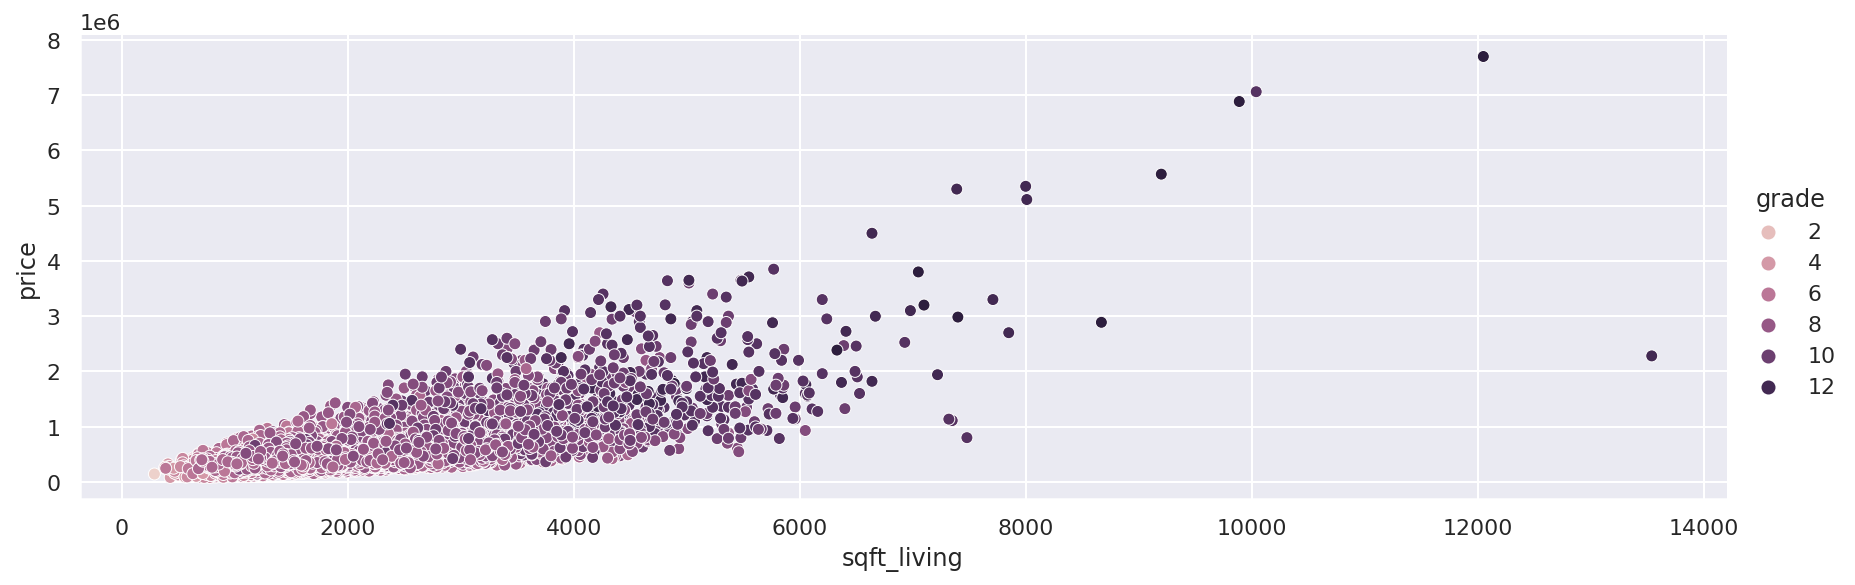

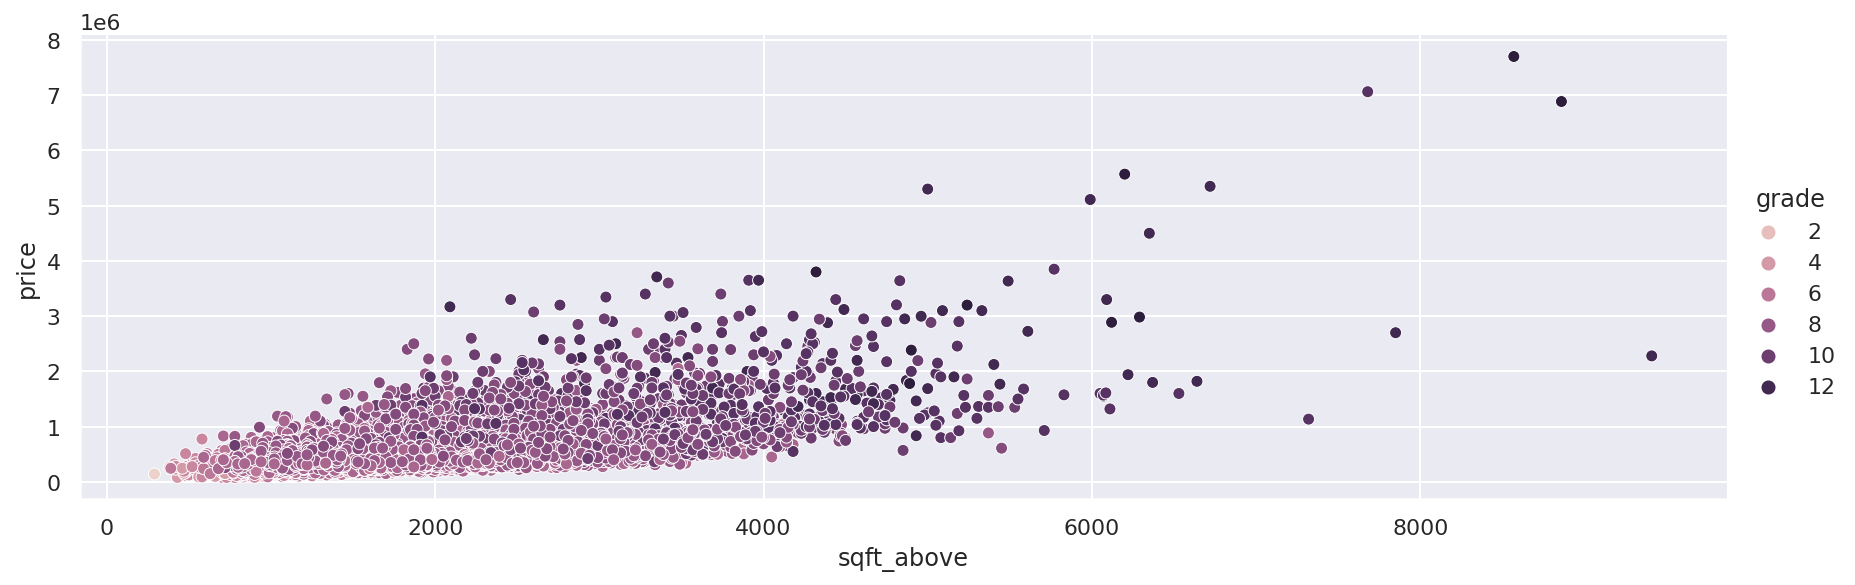

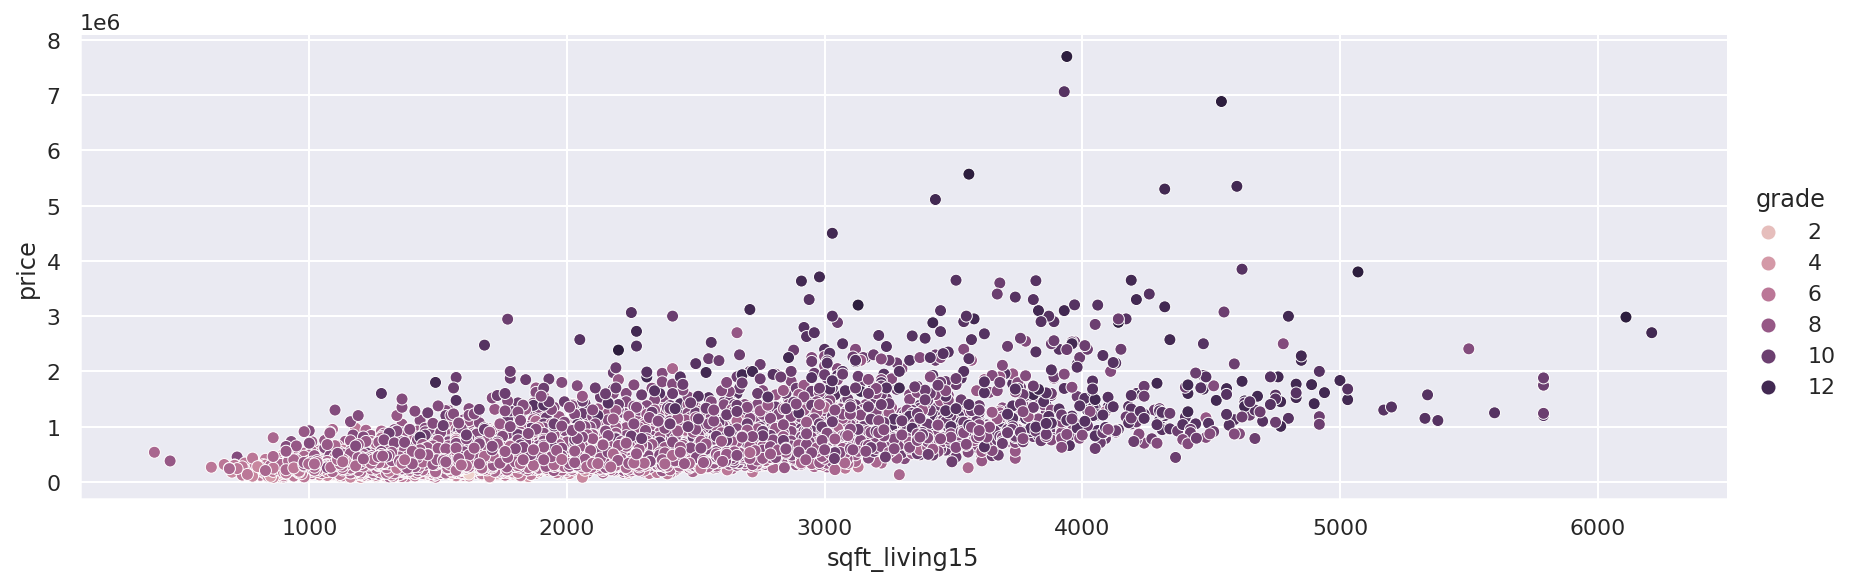

In [10]:
# ÏàòÏπòÎç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∑∏ÎûòÌîÑÎ°ú ÏÇ¥Ìé¥Î≥∏Îã§.
relplot_col=['sqft_living', 'sqft_above', 'sqft_living15']
for col in relplot_col:
    sns.relplot(x=col,y='price',data=train, hue='grade', height=4,aspect=3); plt.show()

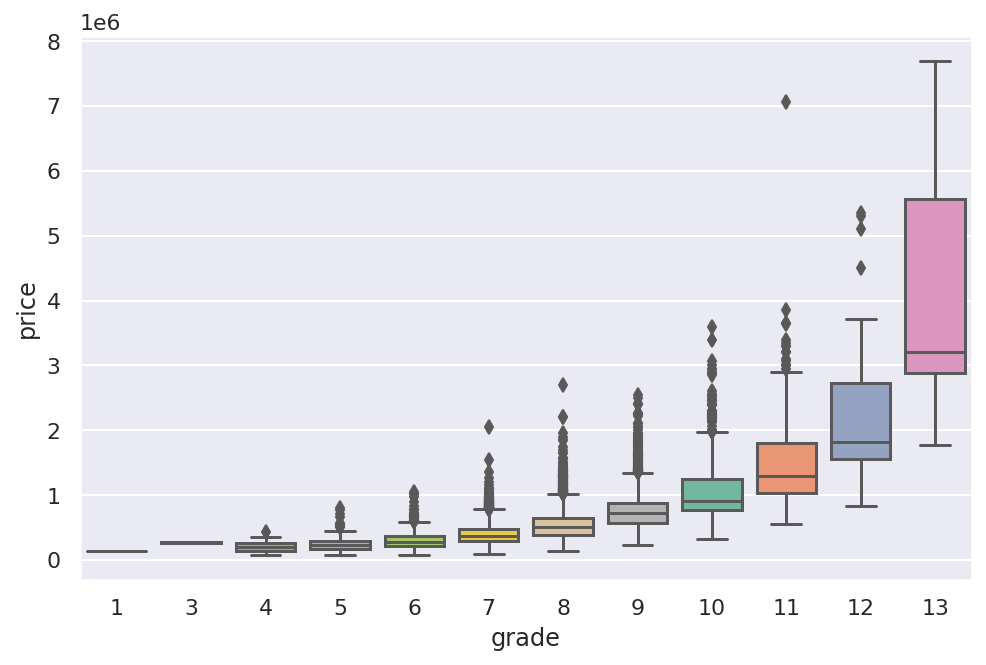

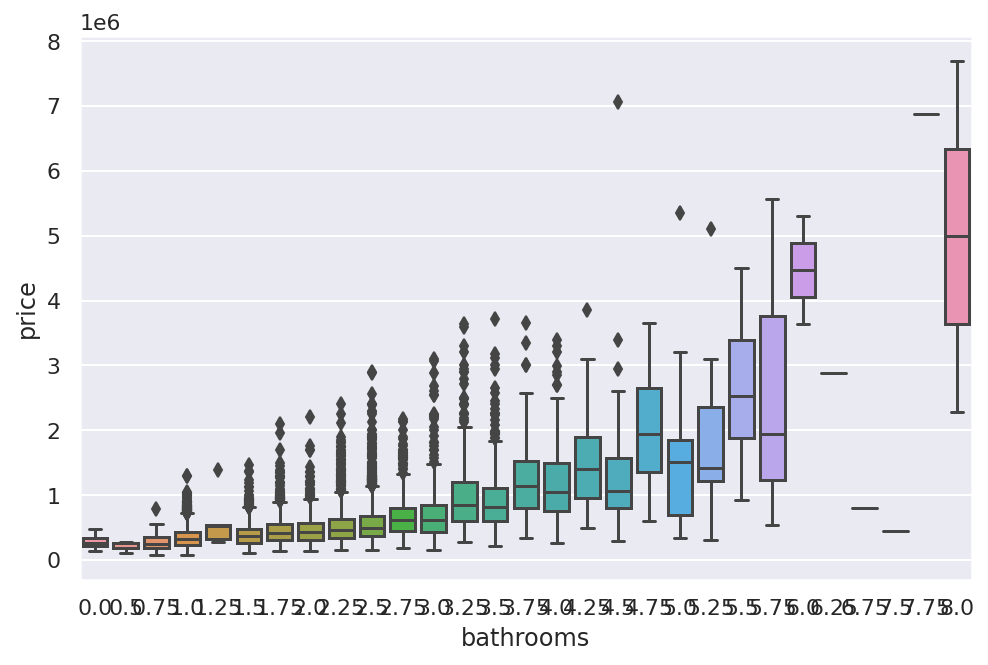

In [11]:
# Î≤îÏ£º Îç∞Ïù¥ÌÑ∞['grade', 'bathrooms']Î≥ÑÎ°ú Í∞ÄÍ≤©Î∂ÑÌè¨Î•º Î∞ïÏä§ÌîåÎ°ØÏúºÎ°ú Î∂ÑÌè¨ÎèÑ ÌååÏïÖ
boxplot_col= ['grade', 'bathrooms']
for col in boxplot_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(col,'price',data=train); plt.show()
    

Í∞ÄÍ≤©Ïùò ÌïòÏúÑÏóê ÎÜíÏùÄ Î∞ÄÎèÑÎ•º Î≥¥Ïù¥ÎäîÎç∞, ÏπòÏö∞Ï≥êÏßÑ Î∂ÑÌè¨Î•º Í≥†Î•∏ Î∂ÑÌè¨Î°ú ÌïòÍ∏∞ ÏúÑÌï¥ priceÎ≥ÄÏàòÎ•º Î°úÍ∑∏ÌôîÏãúÏºúÏïº ÌïúÎã§.

Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [12]:
train['price']

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

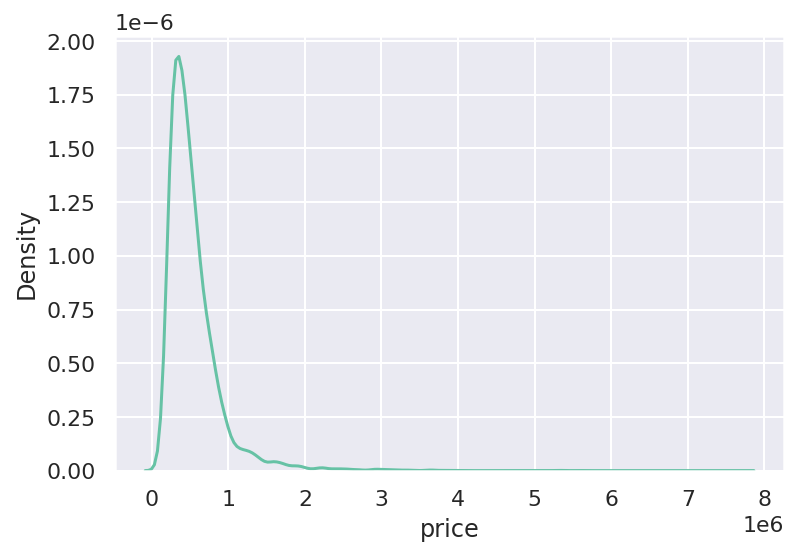

In [13]:
sns.kdeplot(train['price'])
plt.show()

### Í∞ÄÍ≤© Ïª¨ÎüºÏùò Î°úÍ∑∏Ìôî

In [53]:
# Í∞ÄÍ≤© Ïª¨ÎüºÏùÑ Î°úÍ∑∏ÌôîÌïòÍ≥† ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏùÑ ÎßåÎì¨. np.log1p()Ìï®Ïàò ÏÇ¨Ïö©
train['price_log'] = np.log1p(train['price'])   
train['price_log']

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price_log, Length: 15035, dtype: float64

In [15]:
train.head()

price  sqft_living  grade  sqft_above  sqft_living15  bathrooms  \
0  221900.0         1180      7        1180           1340       1.00   
1  180000.0          770      6         770           2720       1.00   
2  510000.0         1680      8        1680           1800       2.00   
3  257500.0         1715      7        1715           2238       2.25   
4  291850.0         1060      7        1060           1650       1.50   

   price_log  
0  12.309987  
1  12.100718  
2  13.142168  
3  12.458779  
4  12.583999

#### Î°úÍ∑∏ÌôîÎêú Í∞ÄÍ≤© Í∏∞Ï§Ä Î∂ÑÌè¨ÎèÑ Ïû¨ÌôïÏù∏

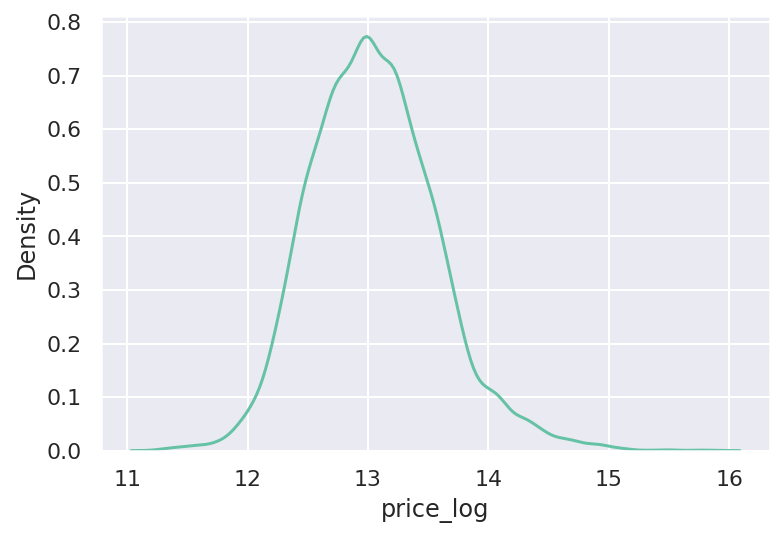

In [16]:
sns.kdeplot(train['price_log'])
plt.show()

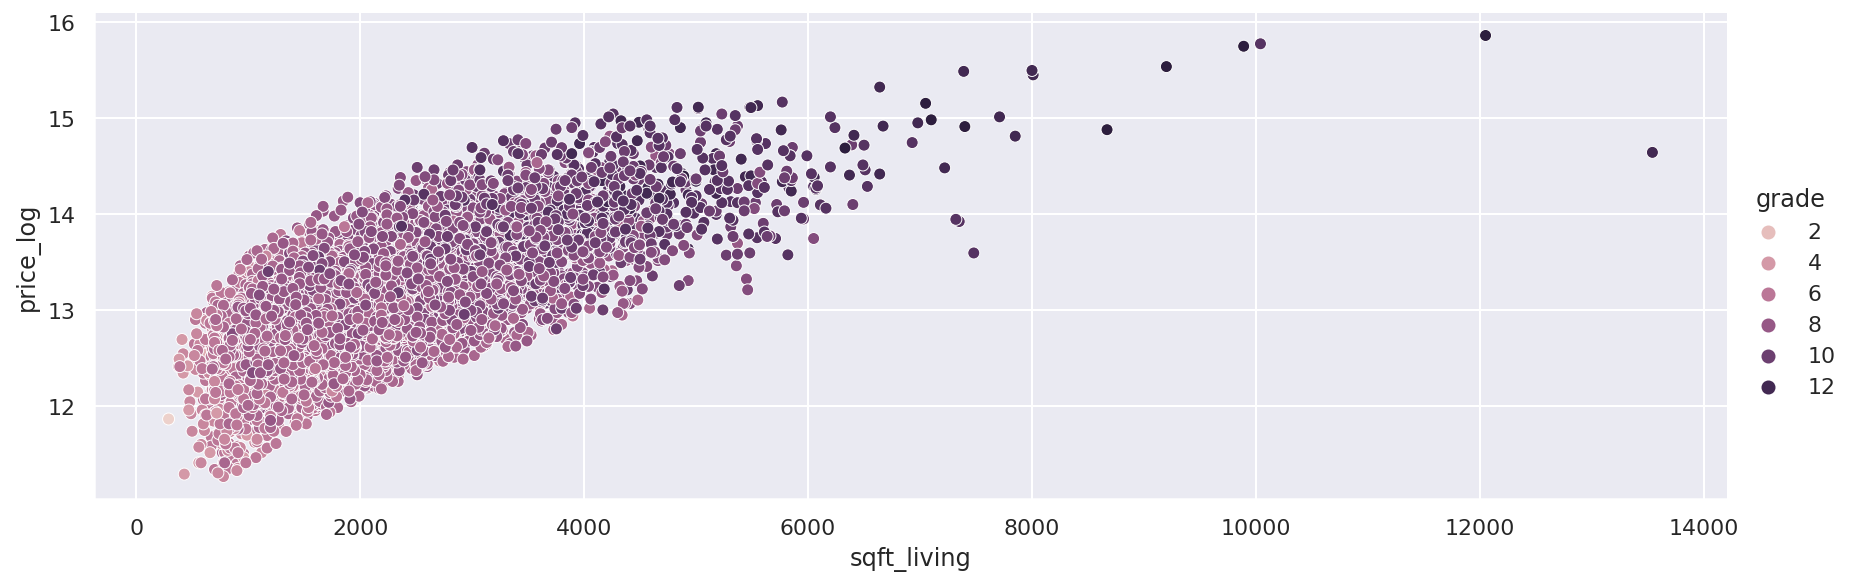

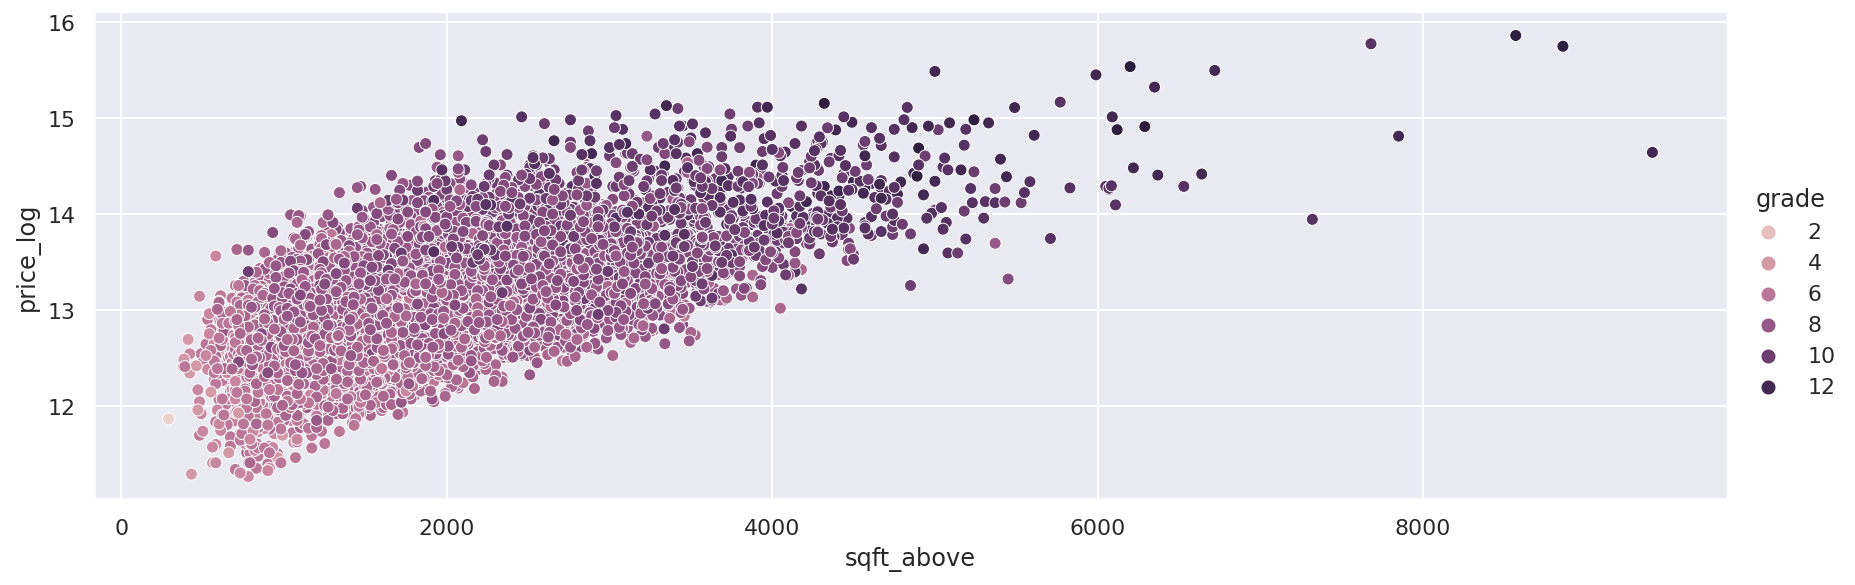

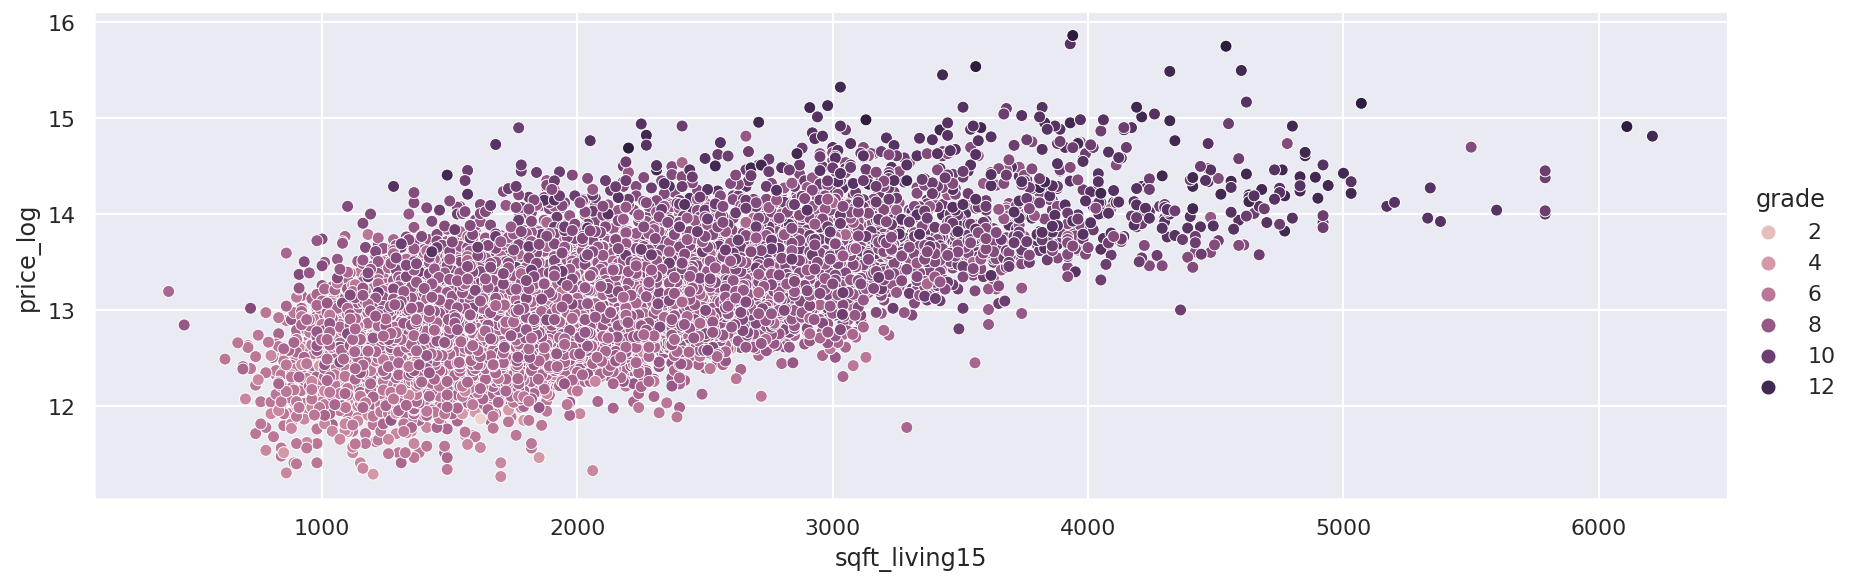

In [17]:
relplot_col=['sqft_living', 'sqft_above', 'sqft_living15']
for col in relplot_col:
    sns.relplot(x=col,y='price_log',data=train, hue='grade', height=4,aspect=3); plt.show()

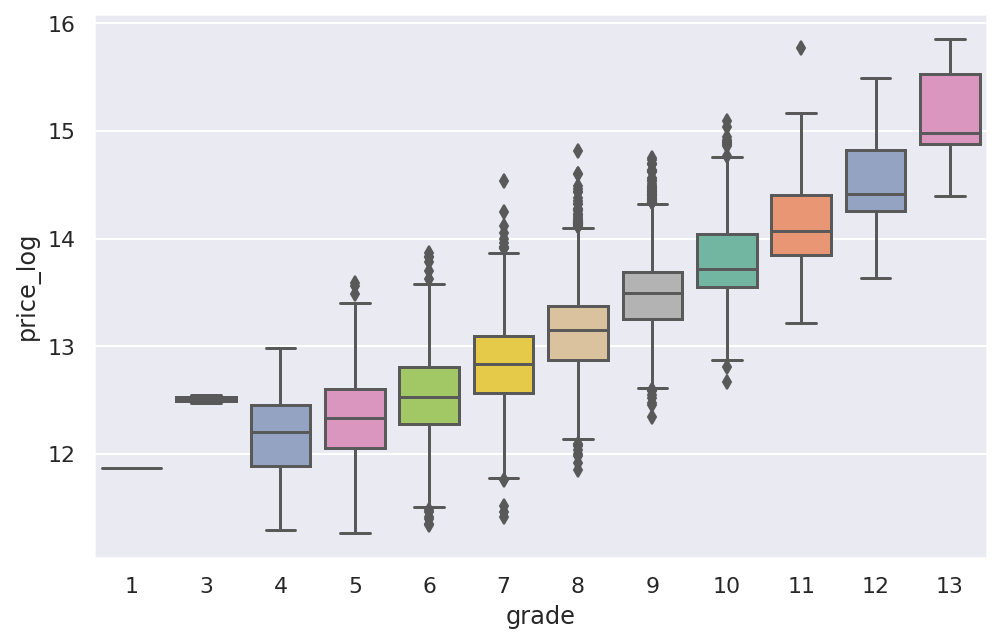

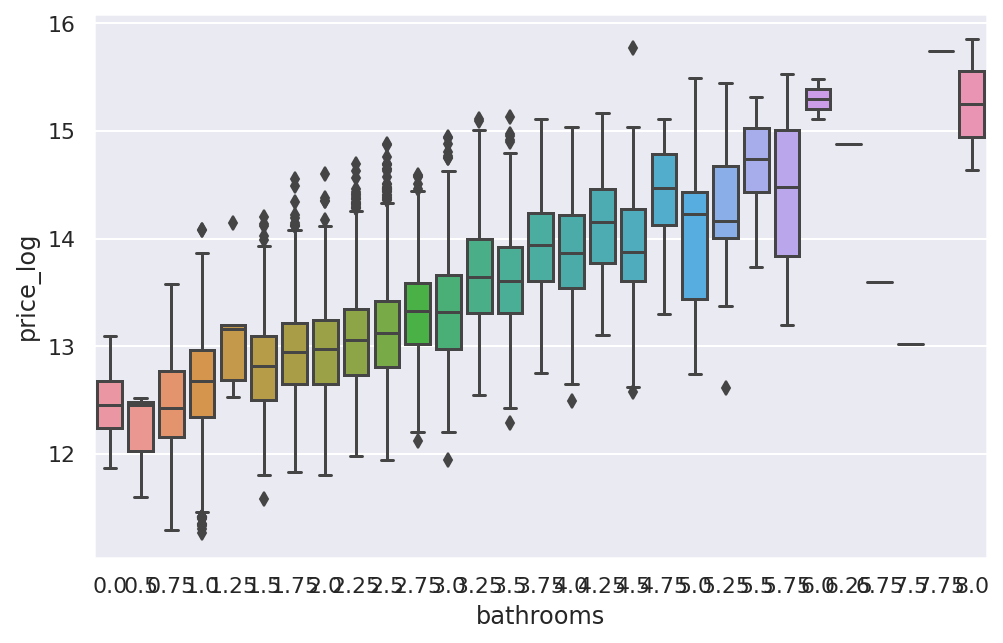

In [18]:
# Î™ÖÎ™©Î≥ÄÏàò ['grade', 'bathrooms']
boxplot_col= ['grade', 'bathrooms']
for col in boxplot_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(col,'price_log',data=train); plt.show()
    

### ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎùºÎ≤® Î≥ÄÏàò Ï∂îÏ∂ú(price Ïª¨Îüº) Î∞è ÌäπÏÑ±Î≥ÄÏàò ÏÉùÏÑ±
train Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ï†úÏô∏. Î®ºÏ†Ä yÎ≥ÄÏàòÎ°ú Ï†ÄÏû•

In [19]:
train.head()

price  sqft_living  grade  sqft_above  sqft_living15  bathrooms  \
0  221900.0         1180      7        1180           1340       1.00   
1  180000.0          770      6         770           2720       1.00   
2  510000.0         1680      8        1680           1800       2.00   
3  257500.0         1715      7        1715           2238       2.25   
4  291850.0         1060      7        1060           1650       1.50   

   price_log  
0  12.309987  
1  12.100718  
2  13.142168  
3  12.458779  
4  12.583999

In [54]:
y = train['price_log']         # ÎùºÎ≤® ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (Î∂ÑÌè¨ÎïåÎ¨∏Ïóê Î°úÍ∑∏Îêú Í∞ÄÍ≤©)

del train['price']             # ÌäπÏÑ± ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (price, price_log ÏÇ≠Ï†ú)
del train['price_log']         # drop() Î©îÏÑúÎìú Ïû¨ÏãúÎèÑ Í≤ÄÌÜ†Ìï† Í≤É
# train.drop(columns=["price", "price_log"])
print(train.columns)

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'], dtype='object')


### Ï†úÏ∂úÏö© ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Ï†ÑÏ≤òÎ¶¨

In [23]:
test_col = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
test_sub = test[test_col]

print(test_sub.columns)

Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'], dtype='object')


## 3. Î™®Îç∏ ÌäúÎãù
### (1) Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Í≥ºÏ∏°Ï†ï (Ïó¨Îü¨ Î™®Îç∏ Ïã§Ìñâ)
#### RMES Í≥ÑÏÇ∞(loss Ìï®Ïàò)
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    # Ïò§Ï∞®Ìï®ÏàòÎäî ÏõêÏûêÎ£å priceÏùò Ï∞®Ïù¥Î•º Í≥ÑÏÇ∞Ìï¥Ïïº ÌïòÎØÄÎ°ú Î°úÍ∑∏Í∞ÄÍ≤©ÏùÑ Î≥µÏõêÌï¥ÏïºÌï® 
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


#### Î™®Îç∏Î≥Ñ Ïò§Ï∞®ÏÇ∞Ï∂ú Ìï®Ïàò ÏÉùÏÑ±

In [29]:
# ÏΩîÎìúÏûëÏÑ± Í≥ºÏ†ú
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

In [30]:
get_scores(models, train, y)

RMSE
RandomForestRegressor      237979.136325
LGBMRegressor              237338.815843
GradientBoostingRegressor  232765.402690
XGBRegressor               231978.866069

### (2) Grid Search
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

#### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞  ÏÑ§Ï†ï

In [43]:
from sklearn.model_selection import GridSearchCV

# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}
print('ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌïòÏòÄÏäµÎãàÎã§.')

Ïñçüí¢


In [44]:
"""
Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÎäî `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

1. GridSearchCV Î™®Îç∏Î°ú `model`ÏùÑ Ï¥àÍ∏∞ÌôîÌï©ÎãàÎã§.
2. Î™®Îç∏ÏùÑ fitting Ìï©ÎãàÎã§.
3. params, scoreÏóê Í∞Å Ï°∞Ìï©Ïóê ÎåÄÌïú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï©ÎãàÎã§. 
4. Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, RMSLE Í∞íÏùÑ Ï∂îÍ∞ÄÌïú ÌõÑ Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìïú `results`Î•º Î∞òÌôòÌï©ÎãàÎã§.
"""

# ÏΩîÎìú ÏûÖÎ†•
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [47]:
my_GridSearch(rdforest, train, y, param_grid, n_jobs=10)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 out of  20 | elapsed:    4.9s remaining:    3.3s
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:    8.7s finished


max_depth  n_estimators     score     RMSLE
3         10           100 -0.113504  0.336903
2         10            50 -0.113805  0.337351
0          1            50 -0.181444  0.425963
1          1           100 -0.182223  0.426876

## 4. Make Submission

In [76]:
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_submission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `submission_model_name_RMSLE_100000.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""

# ÏΩîÎìú ÏûëÏÑ±
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    prediction = prediction.astype(int)        # ÏµúÏ¢Ö Í∞ÄÍ≤©ÏùÑ Ï†ïÏàòÎ°ú Î≥ÄÌôò
    data_dir = os.getenv('HOME')+'/aiffel/Exploration/06_kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [77]:
save_submission(model, train, y, test_sub, 'lgbm', rmsle='0.0168')

/aiffel/aiffel/Exploration/06_kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!


## ÌõÑÍ∏∞

1. ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ Î≥ÄÏàòÎ°ú ÌäπÏÑ±Î≥ÄÏàòÎ•º Íµ¨ÏÑ±ÌïòÏòÄÎäîÎç∞ Í≤∞Í≥ºÏ†ÅÏúºÎ°ú Ïò§Ï∞®Í∞Ä baselineÎ≥¥Îã§ ÌÅ¨Í≤å ÎÇòÏôîÎã§.    
2. ÏãúÍ∞ÑÏù¥ Ï¥âÎ∞ïÌïú Í¥ÄÍ≥ÑÎ°ú Îã§Î•∏ Ï°∞Ìï©ÏùÑ ÌïòÏßÄ Î™ªÌñàÎã§. Îã§Î•∏ Î≥ÄÏàòÎ•º ÎÑ£ÏóàÏùÑ ÎïåÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò Î≥ÄÌôî Î∞è sqftÎãπ Í∞ÄÍ≤© Îì± Îã§ÏñëÌïú Ï°∞Ìï©Ïù¥ Í∞ÄÎä•ÌïòÎ¶¨Îùº Î≥∏Îã§. Ï∂îÌõÑ ÏãúÎèÑÌï¥Î≥¥Í∏∞Î°ú ÌïúÎã§.  
3. Ïù¥Î≤à ÎÖ∏ÎìúÏóêÏÑú ÏñªÏùÄ Í≤ÉÏùÄ Ìï®Ïàò ÏÉùÏÑ±Ïóê ÎåÄÌïú ÏûêÏã†Í∞êÏùÑ ÏñªÏóàÎã§. Ìï®Ïàò ÏûëÏÑ±ÏùÑ ÏúÑÌï¥ ÏïûÎã®ÏóêÏÑú ÏûëÏóÖÌïòÎäî Í≤ÉÍ≥º Í≤ÄÏ¶ùÌïòÎäî ÏûëÏóÖÏùÑ Ï∂©Î∂ÑÌûà ÌïòÏòÄÎã§.    
4. Ï§ëÍ∞ÑÏóê Îç∞Ïù¥ÌÑ∞ÏÖã ÏßÄÏ†ïÏùÑ ÏûòÎ™ªÌïòÏó¨ ÎãπÌòπÌñàÏóàÎäîÎç∞ Ï†ÑÏ≤¥Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÌùêÎ¶ÑÏùÑ ÎÜìÏπòÏßÄ ÎßêÏïÑÏïº ÌïúÎã§Îäî ÍµêÌõàÎèÑ ÏñªÏóàÎã§.